In [ ]:
import finalfig as ff
import numpy as np

total_trials = 5
train_check = 10
d = np.array([2,2,2])
m = 2
q = np.array([1/2, 1/2])
training_trials = 120

bigvec, vec_SDP, _, _ = ff.fulltest(total_trials, training_trials,  d, m, q, train_check, SDP = True, LG = False, local_SDP = False, dep = False)

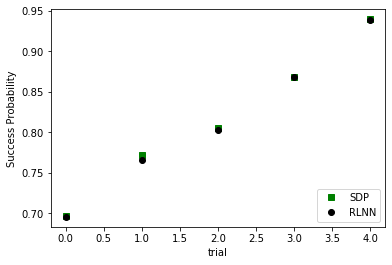

In [2]:
import matplotlib.pyplot as plt
import tikzplotlib as tikz

vec_NN = bigvec[:,-1]
vec_SDP = np.array([vec_SDP]).flatten()
vec_NN = np.array([vec_NN]).flatten()

arrinds = vec_SDP.argsort()
sorted_SDP = vec_SDP[arrinds]
sorted_NN = vec_NN[arrinds]

X = np.arange(total_trials)
plt.xlabel('trial')
plt.ylabel('Success Probability')
plt.plot(X, sorted_SDP, marker = "s", color = 'green', linewidth = 0, label = 'SDP')
plt.plot(X, sorted_NN, color='black', marker = "o", linewidth=0, label = 'RLNN')
plt.legend(loc="lower right")
tikz.save("Fig2a")
plt.show()

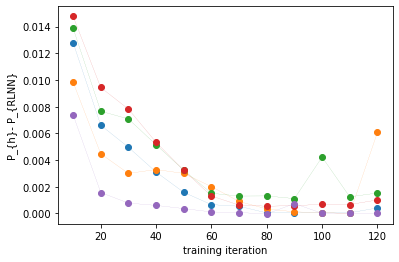

In [3]:
Xvec = train_check*np.arange(int(training_trials/train_check)+1)
for _ in range(len(vec_SDP)):
    SDPvalue = vec_SDP[_]
    diff_vec = SDPvalue*np.ones(int(training_trials/train_check)+1)- bigvec[_]
    plt.plot(Xvec[1:,], diff_vec[1:,], marker = 'o', linewidth = 0.1)
plt.xlabel('training iteration')
plt.ylabel('P_{h}- P_{RLNN}')
tikz.save('training_curves')
tikz.save("Fig2b")
plt.show()